In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
import re

/Users/kimhyunkyunkim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
raw_df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1') #import data

In [4]:
raw_df = raw_df[["v2", "v1"]] # v2 = feature v1 = target

In [5]:
raw_df['target'] = [1 if val == "spam" else 0 for val in raw_df.v1] # for future model make target var 1: spam 0: ham

In [6]:
raw_df.shape

(5572, 3)

Text(0.5, 1.0, 'Ham VS Spam')

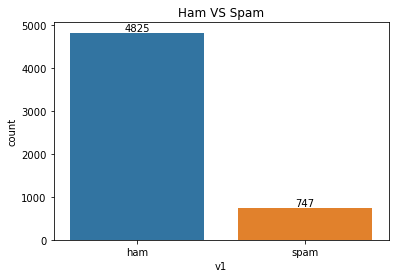

In [7]:
ax = sns.countplot(data = raw_df, x="v1")
ax.bar_label(ax.containers[0])
ax.set_title("Ham VS Spam")

In [8]:
#nltk.download('stopwords') download it
def word_c(x):
    words = ' '.join(x).lower() # change str to lowercase
    words = re.sub('[^a-z]+', ' ', words) # if character is not alphabet change to ' '
    words = nltk.word_tokenize(words)# do tokenization for words
    words_f = [word for word in words if len(word) > 1] # extract word that is not

    stop_words = list(get_stop_words('en')) # kind of useless word for NLP
    words_tokenize = [word for word in words_f if word not in stop_words] # filter words not in stop words
    words_tokenize = ' '.join(words_tokenize) # merge all words in one string with space
    return words_tokenize

spam = word_c(raw_df[raw_df.v1 == 'spam'].v2) #divide data with spam and ham
ham = word_c(raw_df[raw_df.v1 == 'ham'].v2)

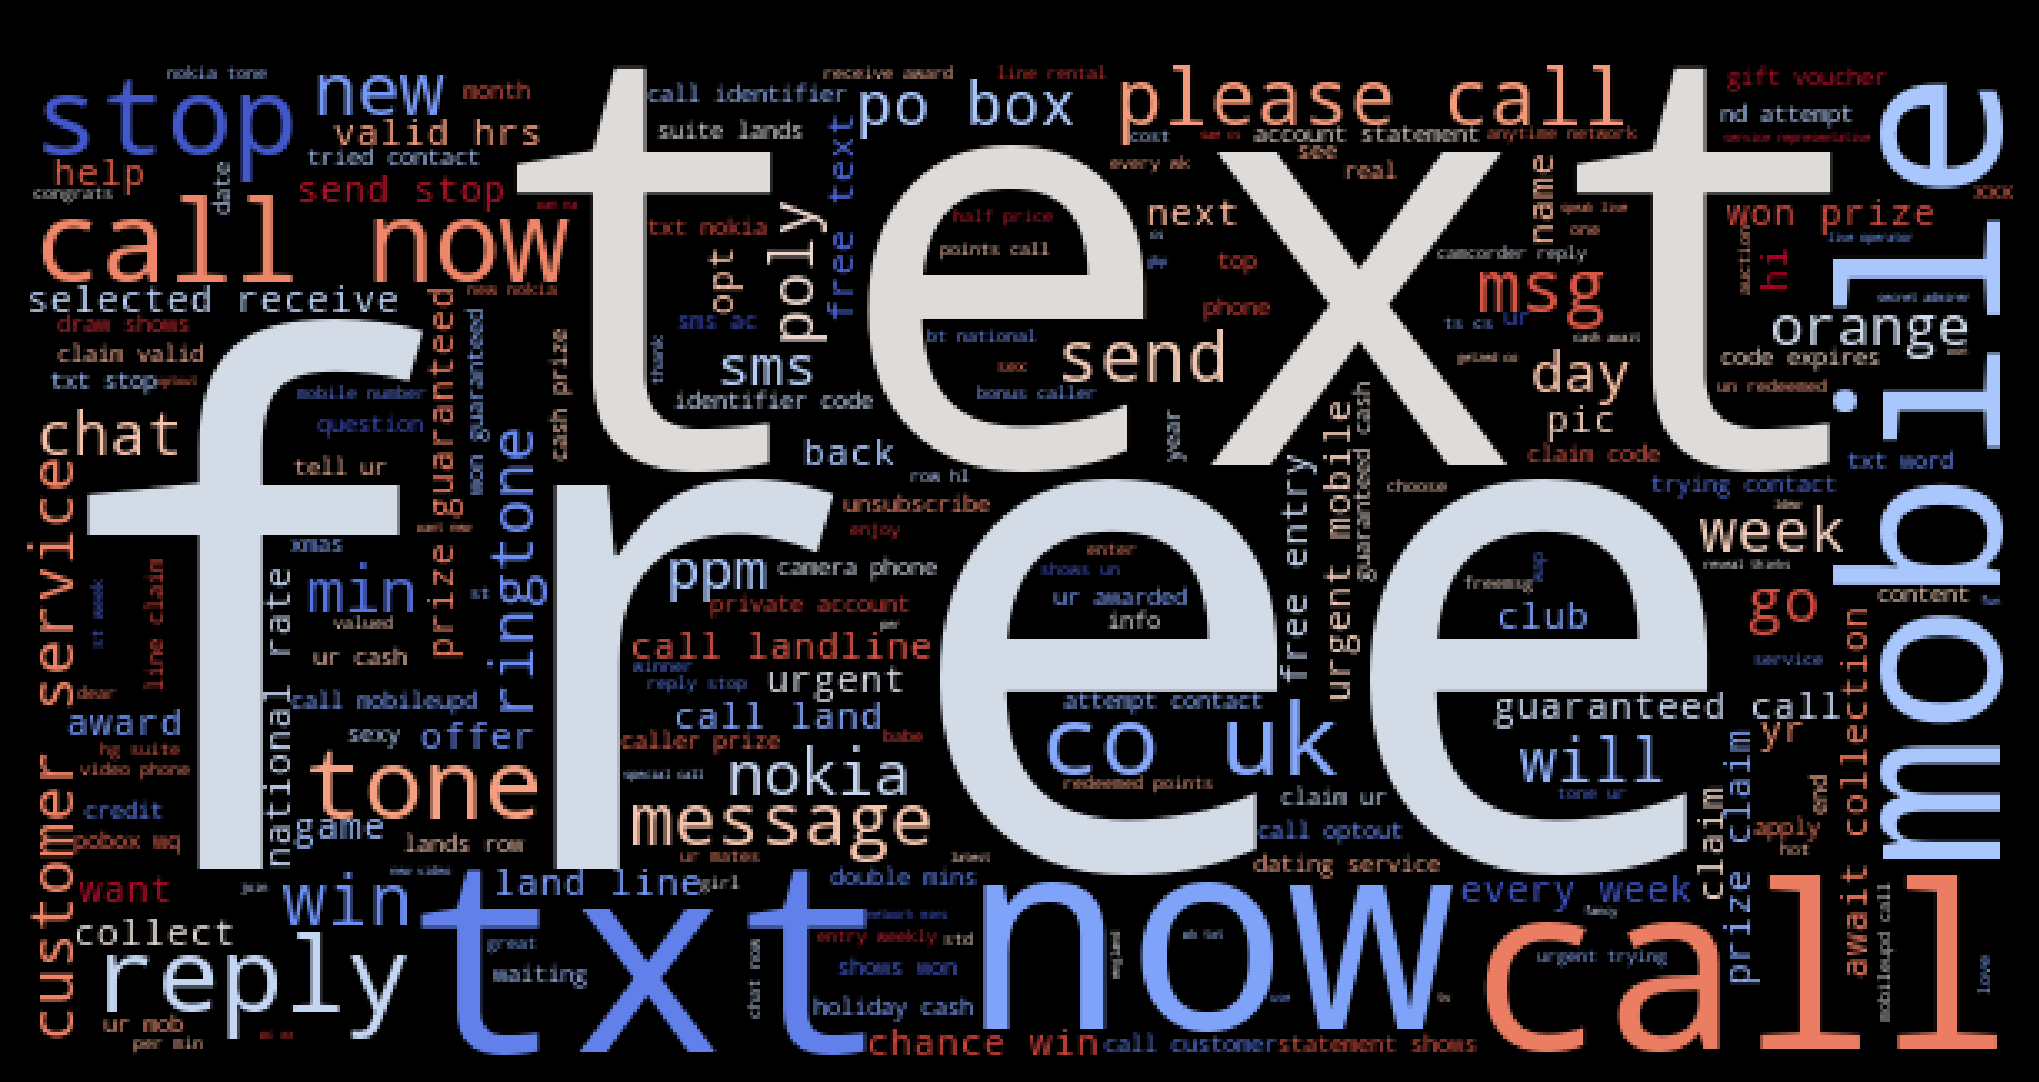

In [9]:
#word cloud for spam
colormap = 'coolwarm'
wc = WordCloud(width=600,height=300, colormap = colormap)
cld = wc.generate(spam)
plt.figure(figsize=(10,5), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam message Word Cloud')
plt.show()

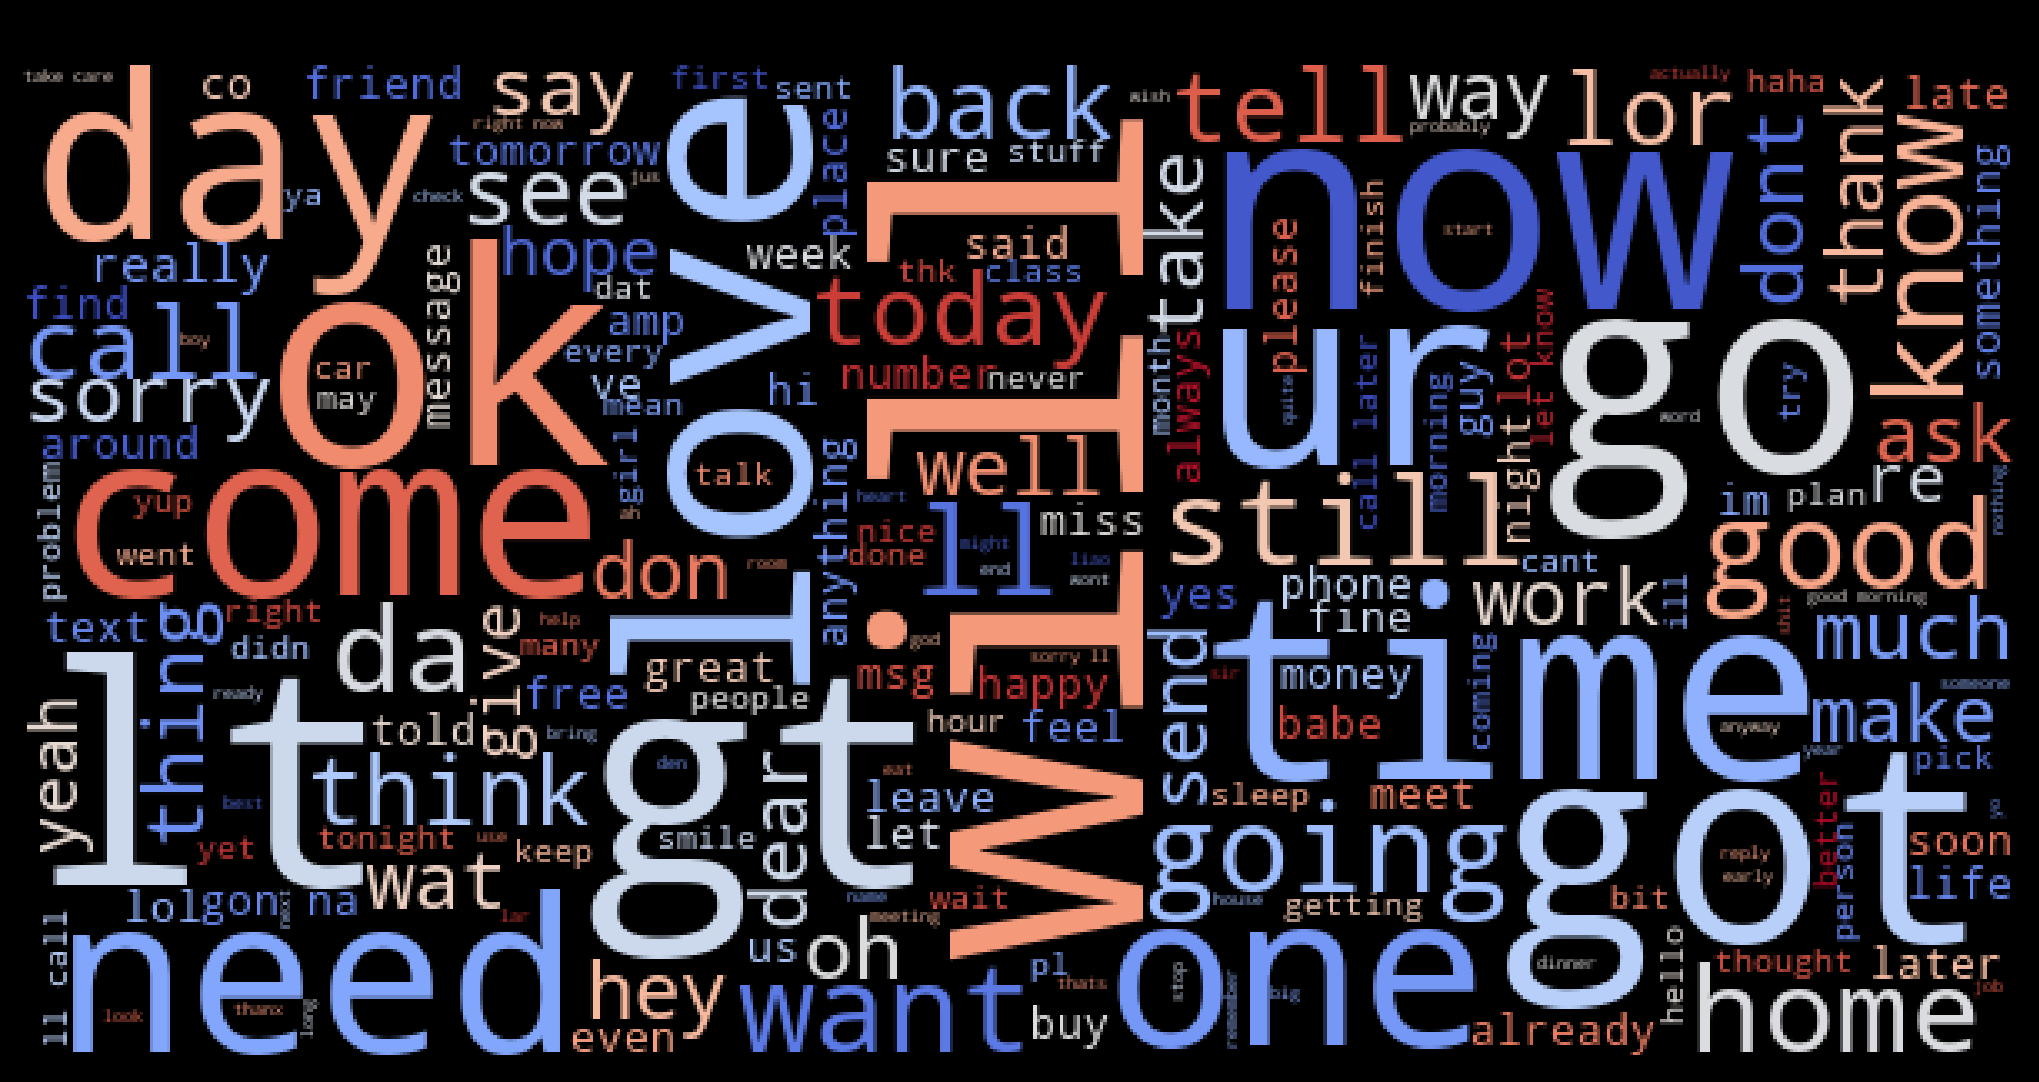

In [10]:
# wordcloud for ham

colormap = 'coolwarm'
wc = WordCloud(width=600,height=300, colormap = colormap)
cld = wc.generate(ham)
plt.figure(figsize=(10,5), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam message Word Cloud')
plt.show()

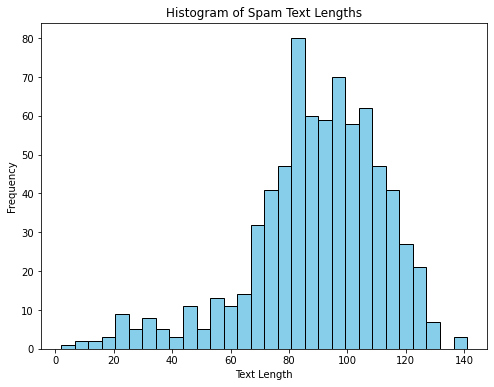

In [11]:
spam2 = raw_df[raw_df.v1 == 'spam'].v2.apply(lambda x : word_c([x])) # Use lambda function to get clean text for each data
spam_lengths = spam2.apply(len) # Use apply function to get len of each text
# spam2
plt.figure(figsize=(8, 6))
plt.hist(spam_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Spam Text Lengths')
plt.show()

In [12]:
spam_lengths

2        99
5        81
8        98
9        90
11       82
       ... 
5537     58
5540    116
5547    117
5566     98
5567     85
Name: v2, Length: 747, dtype: int64

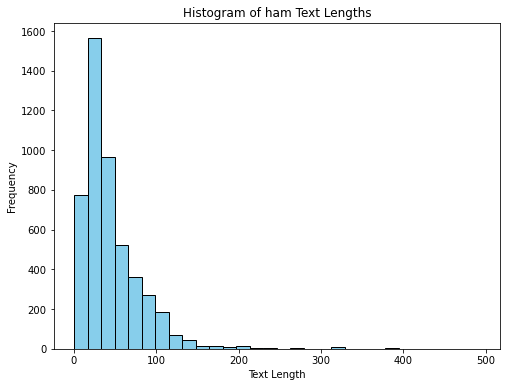

In [13]:
ham2 = raw_df[raw_df.v1 == 'ham'].v2.apply(lambda x : word_c([x]))
ham_lengths = ham2.apply(len)
# ham2
plt.figure(figsize=(8, 6))
plt.hist(ham_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of ham Text Lengths')
plt.show()

# Data preprocessing

In [14]:
length = raw_df.v2.apply(lambda x : word_c([x]))
length = length.apply(len)

In [15]:
length

0       78
1       21
2       99
3       29
4       42
        ..
5567    85
5568    28
5569    21
5570    79
5571    14
Name: v2, Length: 5572, dtype: int64

In [16]:
raw_df_transform =  raw_df.v2.apply(lambda x : word_c([x]))

In [18]:
raw_df['transform'] = raw_df_transform
raw_df.head()

,v2,v1,target,transform
0,"Go until jurong point, crazy.. Available only ...",ham,0,go jurong point crazy available bugis great wo...
1,Ok lar... Joking wif u oni...,ham,0,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,ham,0,dun say early hor already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,0,nah don think goes usf lives around though


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer() # using CountVecotrizer
x_cnt = cnt_vect.fit_transform(raw_df['transform']).toarray()
x_cnt = pd.DataFrame(x_cnt)
x_cnt.columns = x_cnt.columns.astype(str)
x_cnt['length'] = length
y = raw_df['target']

In [20]:
x_cnt.head()

,0,1,2,3,4,5,6,7,8,9,...,7554,7555,7556,7557,7558,7559,7560,7561,7562,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,78
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range = (1, 2)) # Using TfidfVectorizer
x_tfidf = tfidf_vect.fit_transform(raw_df['transform']).toarray()
x_tfidf = pd.DataFrame(x_tfidf)
x_tfidf.columns = x_tfidf.columns.astype(str)
x_tfidf['length'] = length

In [23]:
x_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,38614,38615,38616,38617,38618,38619,38620,38621,38622,length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42


# Countvectorizer

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_cnt, y, test_size = 0.3, random_state = 121)

In [23]:
X_train.shape

(3900, 7564)

In [24]:
X_test.shape

(1672, 7564)

In [25]:
# Logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
lr_acc

0.9826555023923444

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

array([[1455,    3],
       [  26,  188]])

In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Grid Search

max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = accuracy_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = accuracy_score(y_test, dt_preds)
    print(dt)
    
    
dt_clf = DecisionTreeClassifier(max_depth = 12, min_samples_split = 16, random_state = 121)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
dt_acc


0.9545454545454546
0.9569377990430622
0.9581339712918661
0.958732057416268
Next
0.9545454545454546
0.9569377990430622
0.9575358851674641
0.9575358851674641


0.958732057416268

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

array([[1438,   20],
       [  49,  165]])

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 121)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
rf_acc

0.9754784688995215

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix

array([[1458,    0],
       [  41,  173]])

In [31]:
# Support Vector Machine

from sklearn import svm
svm_clf = svm.SVC(kernel = "linear")
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
svm_acc

0.9808612440191388

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_preds)
confusion_matrix

array([[1449,    9],
       [  23,  191]])

# TfidfVectorizer

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size = 0.3, random_state = 121)

In [33]:
# logistic regression
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
lr_acc

0.9503588516746412

In [34]:
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

array([[1450,    8],
       [  75,  139]])

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Grid Search

max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = accuracy_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = accuracy_score(y_test, dt_preds)
    print(dt)
    
    
dt_clf = DecisionTreeClassifier(max_depth = 12, min_samples_split = 16, random_state = 121)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
dt_acc


0.9539473684210527
0.9575358851674641
0.958732057416268
0.9599282296650717
Next
0.9539473684210527
0.9575358851674641
0.9581339712918661
0.9599282296650717


0.9599282296650717

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

array([[1433,   25],
       [  42,  172]])

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 121)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
rf_acc

0.9677033492822966

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix

array([[1458,    0],
       [  54,  160]])

In [39]:
# Support Vector Machine

from sklearn import svm
svm_clf = svm.SVC(kernel = "linear")
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
svm_acc

0.9784688995215312

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_preds)
confusion_matrix

array([[1457,    1],
       [  35,  179]])